## Observations and Insights 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on = "Mouse ID")

# Display the data table for preview
mouse_study.shape
#mouse_study.columns
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Checking the number of mice.
mice_count = len(mouse_study["Mouse ID"].unique())

# create df with total number of mice
total_mice_count = pd.DataFrame({"Mouse ID" :mice_count}, index = [0])
total_mice_count.head()

,Mouse ID
0,249


In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]).sum()

#mouse_study.duplicated().sum()
#mouse_study.loc[mouse_study.duplicated(), :]

5

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mice.count;

In [87]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(clean_mice["Mouse ID"].unique())

total_mice_count2 = pd.DataFrame({"Mouse ID": mice_count2}, index = [0])
total_mice_count2.head()

total_mice_count2.head()

,Mouse ID
0,249


## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum_stats = clean_mice.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of 
## each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_vol_avg = sum_stats["Tumor Volume (mm3)"].mean()
tum_vol_med = sum_stats["Tumor Volume (mm3)"].median()
tum_vol_var = sum_stats["Tumor Volume (mm3)"].var()
tum_vol_std = sum_stats["Tumor Volume (mm3)"].std()
tum_vol_SEM = sum_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
sum_stats_table = pd.DataFrame({"Mean": tum_vol_avg,
                               "Median": tum_vol_med,
                               "Variance": tum_vol_var,
                               "Standard Deviation": tum_vol_std,
                               "SEM": tum_vol_SEM})
sum_stats_table.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_stats["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count of Tumor Volume (mm3)')

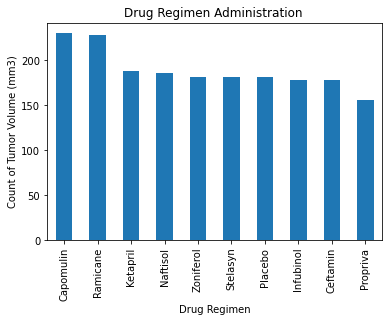

In [102]:
# Generate a bar plot showing the total number of measurements taken on each 
## drug regimen using pandas.
drug_regimen_bar_chart = clean_mice["Drug Regimen"].value_counts().plot.bar()
drug_regimen_bar_chart.set_title("Drug Regimen Administration ")
drug_regimen_bar_chart.set_xlabel("Drug Regimen")
drug_regimen_bar_chart.set_ylabel("Count of Tumor Volume (mm3)")


<BarContainer object of 10 artists>

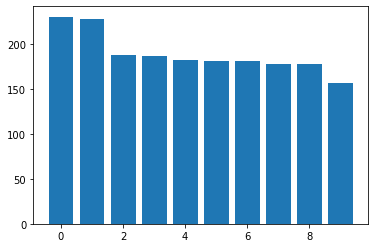

In [108]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_reg_counts = clean_mice["Drug Regimen"].value_counts()
drug_reg_counts

x_axis = np.arange(len(drug_reg_counts))

plt.figure(figsize=)
plt.bar(x_axis, drug_reg_counts)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
